In [152]:
import numpy as np
import sys

if "../" not in sys.path:
    sys.path.append("../") 

from lib.envs.simple_rooms import SimpleRoomsEnv
from lib.envs.cliff_walking import CliffWalkingEnv
from lib.simulation import Experiment
import matplotlib.pyplot as plt

# import tensorflow as tf

np.random.seed(678)
tf.set_random_seed(6789)

interactive = True
%matplotlib nbagg    

class Agent(object):

    def __init__(self, actions):
        self.actions = actions
        self.num_actions = len(actions)

    def act(self, obs):
        raise NotImplementedError
        
class RandomAgent(Agent):
    
    def __init__(self, actions):
        super(RandomAgent, self).__init__(actions)
    
    def act(self, obs):
        return np.random.randint(0,self.num_actions)
        
class PerfectAgent(Agent):
    
    def __init__(self, actions):
        super(PerfectAgent, self).__init__(actions)
        self.perfect_table = np.array(
            [
                1,1,1,3,
                3,0,1,3,
                1,3,3,3,
                1,1,1,1
            ]
        )
    
    def act(self, obs):
        where_i_am = np.argmax(obs)
        if where_i_am == 0 : return np.random.randint(0,self.num_actions)
        which_action = self.perfect_table[where_i_am]
        return which_action
    
class LearningAgent(Agent):
    
    def __init__(self, actions,worldspace,actionspace):
        super(LearningAgent, self).__init__(actions)
        self.q_table = np.random.rand(worldspace,actionspace)
    
    def act(self, obs):
        where_i_am = np.argmax(obs)
        action = np.argmax(self.q_table[where_i_am,:])
        print(action)
        return action
    
    def get_qtable(self): return self.q_table

In [164]:
max_number_of_episodes = 5
env = SimpleRoomsEnv()

print(dir(env))

print(env.single_reward(1,2,[9,9]))
print(env.single_step(1,3))


sys.exit()
agent = LearningAgent(range(env.action_space.n),16,4)
experiment = Experiment(env, agent)
experiment.run_agent(max_number_of_episodes, interactive)

['P', 'R', 'S', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_convert_state', '_get_render_coords', '_render_maze', '_rendered_maze', 'action_space', 'actions', 'max_trajectory_length', 'render', 'reset', 'single_reward', 'single_step', 'step', 'tolerance']
9
5


SystemExit: 

C:\Users\JDSeo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2971: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [142]:
max_number_of_episodes = 5
env = SimpleRoomsEnv()
agent = PerfectAgent(range(env.action_space.n))
experiment = Experiment(env, agent)
experiment.run_agent(max_number_of_episodes, interactive)

<IPython.core.display.Javascript object>


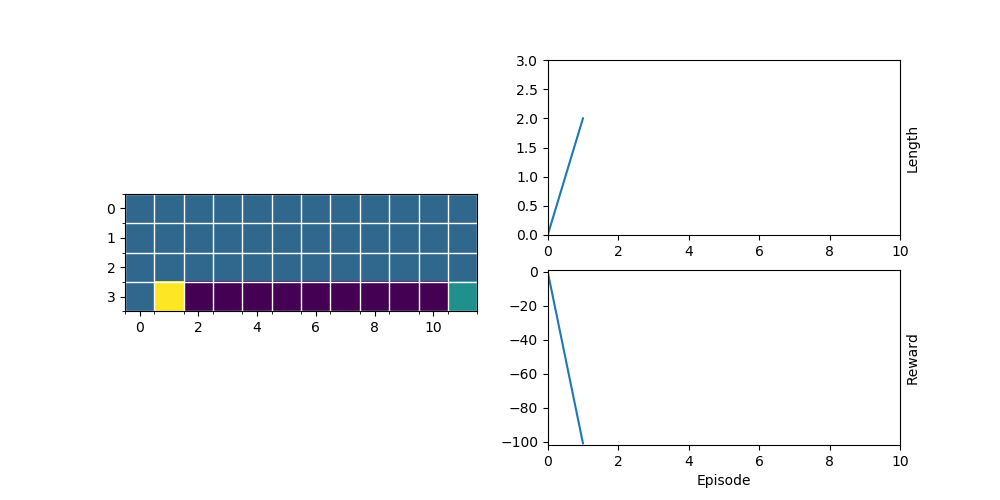

In [117]:
max_number_of_episodes = 1
env = CliffWalkingEnv()
agent = RandomAgent(range(env.action_space.n))
experiment = Experiment(env, agent)
experiment.run_agent(max_number_of_episodes, interactive)

<IPython.core.display.Javascript object>


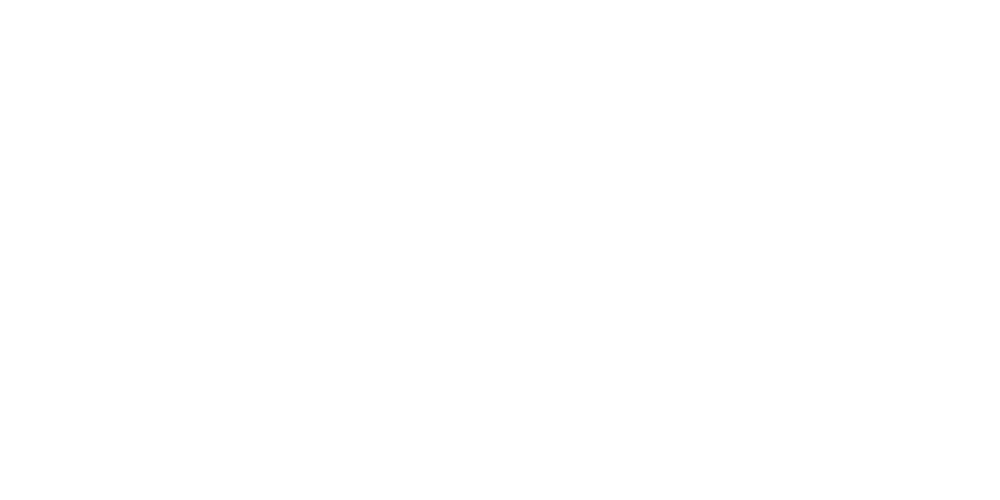

<IPython.core.display.Javascript object>


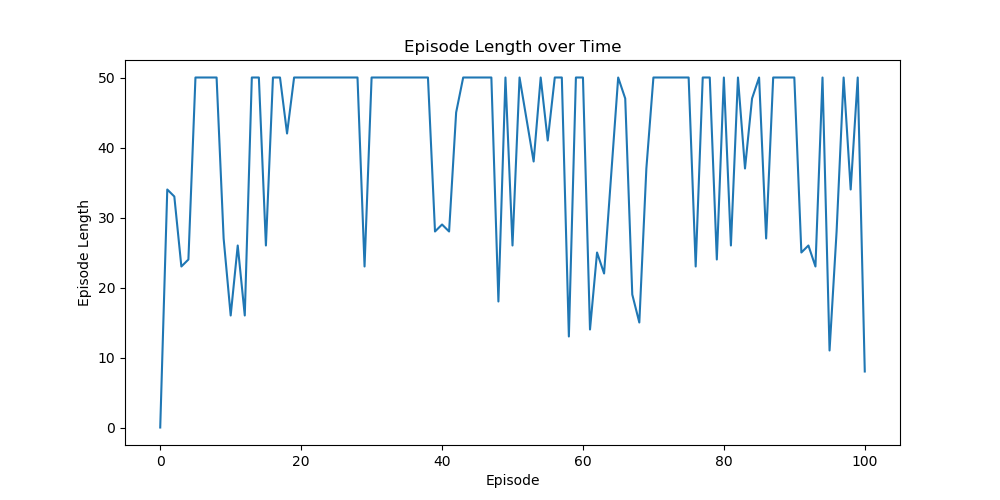

<IPython.core.display.Javascript object>


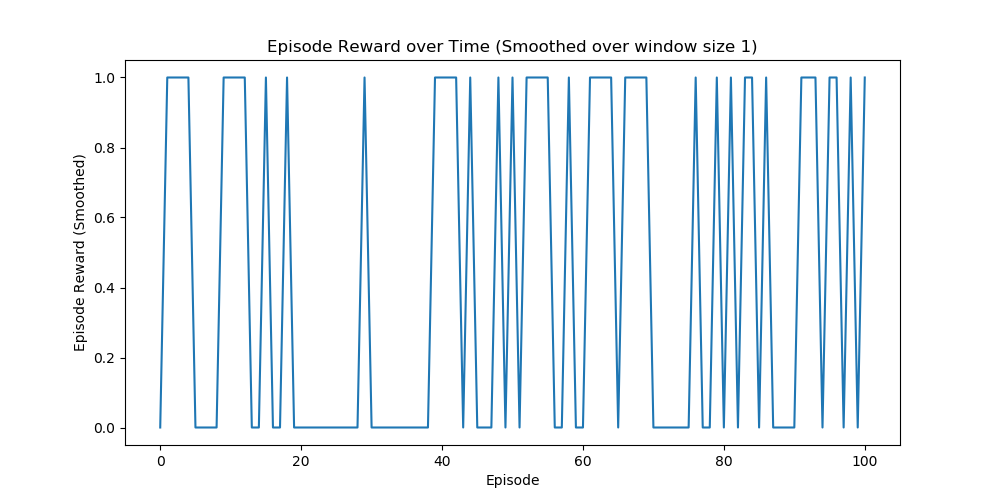

In [120]:
max_number_of_episodes = 100
env = SimpleRoomsEnv()
agent = RandomAgent(range(env.action_space.n))
experiment = Experiment(env, agent)
experiment.run_agent(max_number_of_episodes, False)

<IPython.core.display.Javascript object>


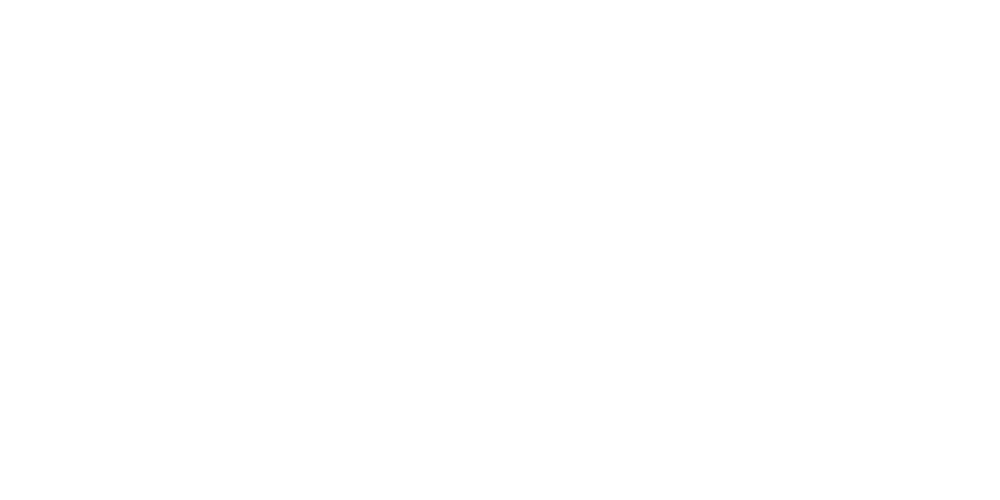

<IPython.core.display.Javascript object>


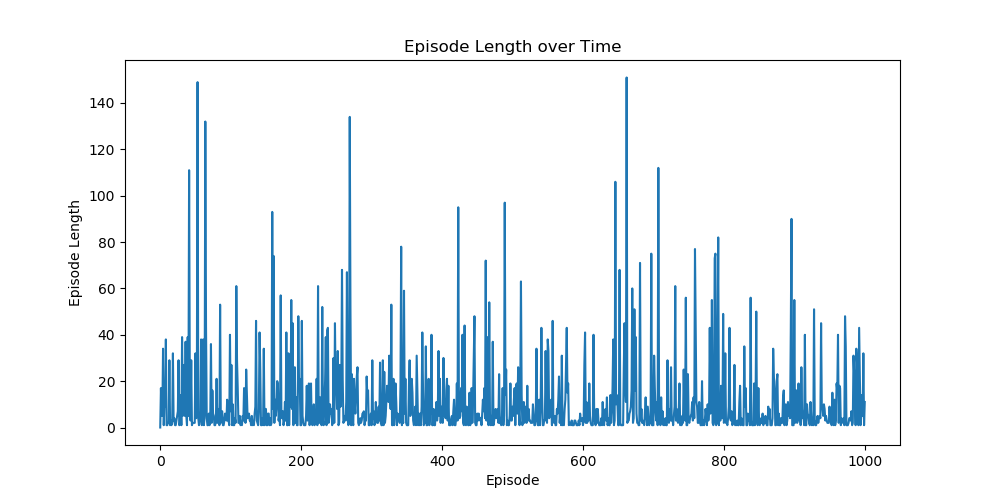

<IPython.core.display.Javascript object>


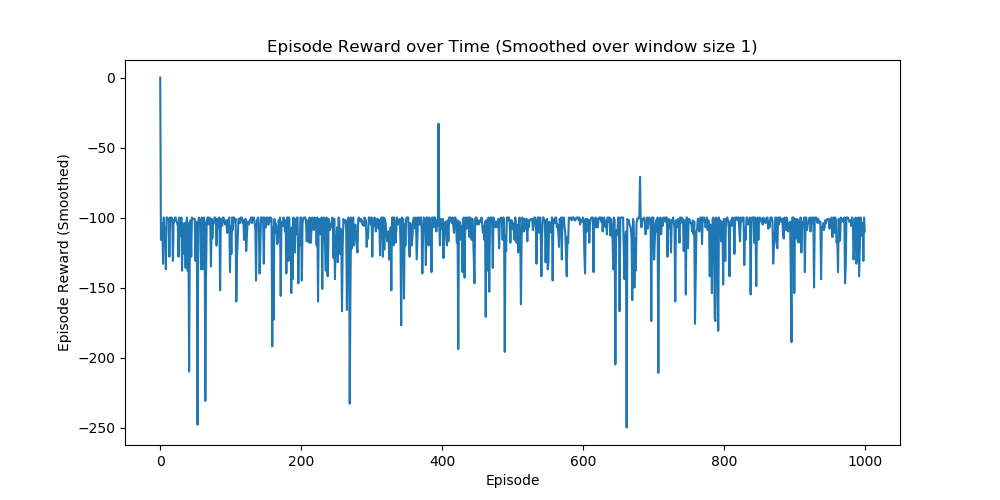

In [122]:
max_number_of_episodes = 1000
env = CliffWalkingEnv()
agent = RandomAgent(range(env.action_space.n))
experiment = Experiment(env, agent)
experiment.run_agent(max_number_of_episodes, False)